# Hybrid Nanofluid Density Analysis Using Clustering

**Author:** Deepak Binkam  
**Course:** Data Mining (COSC 757), Towson University

---
Data Used: [Kaggle Nanofluid Density Dataset](https://www.kaggle.com/datasets/ai4a-lab/nanofluid-density-prediction)

Hybrid nanofluids—fluids engineered by dispersing multiple types of nanoparticles into a base fluid—are at the forefront of research in thermal management for industries such as automotive, electronics cooling, and energy systems. Accurately predicting their density is essential for optimizing fluid dynamics, heat transfer, and overall system efficiency.

In this project, I use unsupervised machine learning—specifically, clustering techniques—to explore patterns and natural groupings within an experimental dataset of 436 hybrid nanofluid samples. The goal is to reveal meaningful clusters based on variables such as temperature, nanoparticle composition, and concentration, providing insight into how these factors affect density and behavior.

**Key objectives:**
- Clean and preprocess the dataset, preserving genuine experimental variability.
- Engineer features and visualize key relationships to inform the clustering process.
- Apply and compare multiple clustering algorithms (K-Means, Agglomerative, and DBSCAN).
- Evaluate and interpret clusters to extract practical insights for nanofluid formulation and testing.

Python, pandas, scikit-learn, matplotlib, seaborn

---

_This notebook demonstrates a data-driven approach to uncovering structure in hybrid nanofluid datasets, with direct applications in research and engineering practice._


#Nanoparticle Density Prediction Model


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

density_df = pd.read_csv('/content/drive/MyDrive/Nanofluid Density Prediction Data/Density_Prediction_Dataset.csv')
density_df.head()

#The overall density will be the target variable

,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000


In [ ]:
density_df.describe()

,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,39.701835,0.594828,5380.229358,2470.642202,998.243922,57.522936,42.477064,1016.367329
std,12.444935,0.641171,1858.166923,895.044108,17.723083,28.018663,28.018663,22.694970
min,16.000000,0.000000,3100.000000,1910.000000,977.600000,17.000000,20.000000,983.010000
25%,30.000000,0.100000,4320.000000,2100.000000,990.220000,20.000000,20.000000,998.687325
50%,40.000000,0.300000,4320.000000,2100.000000,994.080000,80.000000,20.000000,1010.319085
75%,50.000000,1.000000,5810.000000,2220.000000,997.130000,80.000000,80.000000,1028.173007
max,70.000000,2.000000,10490.000000,5810.000000,1063.000000,80.000000,83.000000,1093.432000


In [ ]:
#Checking to see how unique the data is


print("\nUnique values for 'Base Fluid':")
print(density_df["Base Fluid"].unique())

print("\nUnique values for 'Nano Particle':")
print(density_df["Nano Particle"].unique())

print("\nUnique values for 'Volume Concentration (ϕ)':")
print(density_df["Volume Concentration (ϕ)"].unique())

print("\nUnique values for 'Temperature (T)':")
print(density_df["Temperature (°C)"].unique())

print("\nUnique values for Density of Base Fluid (g/cm^3):")
print(density_df["Density of Base Fluid (ρbf)"].unique())

print("\nUnique values for Density of Nano Particle 1 (g/cm^3):")
print(density_df["Density of Nano Particle 1 (ρnp)"].unique())

print("\nUnique values for Density of Nano Particle 2 (g/cm^3):")
print(density_df["Density of Nano Particle 2 (ρnp)"].unique())

print("\nUnique values for 'Volume Mixture of Particle 1':")
print(density_df["Volume Mixture of Particle 1"].unique())

print("\nUnique values for 'Volume Mixture of Particle 2':")
print(density_df["Volume Mixture of Particle 2"].unique())

print("\nUnique values for 'Density of Mixture':")
print(density_df["Density (ρ)"].unique())



Unique values for 'Base Fluid':
['Water' 'GB' 'DW' 'W-EG(60:40%), Water ']

Unique values for 'Nano Particle':
['Al₂O₃/SiO₂ ' 'TiO₂-SiO₂ ' 'Fe₃O₄-MWCNT ' 'Al₂O₃-CNT ' 'Al₂O₃-MWCNT '
 'TiO₂-MWCNT ' 'CeO₂-MWCNT ' 'ZnO-MWCNT ' 'MgO-MWCNT ' 'CuO-MWCNT '
 ' Co₃O₄/rGO ' 'TiO₂-MgO ' 'Ag-GNP ' 'ND-Fe₃O₄ ']

Unique values for 'Volume Concentration (ϕ)':
[0.05  0.1   0.2   0.005 0.01  0.015 0.02  0.025 0.03  0.    0.3   0.25
 0.5   0.75  1.    1.25  1.5   1.75  2.    0.99  1.24  1.49  0.4  ]

Unique values for 'Temperature (T)':
[20 30 40 50 60 70 25 35 45 55 16 22 28 34 46 52 58 64]

Unique values for Density of Base Fluid (g/cm^3):
[ 998.29  995.71  992.25  988.02  983.13 1045.6  1043.36 1040.96 1038.4
 1035.68  998.5   997.13  994.08  990.22  985.65  999.    997.9   996.3
  994.4   992.3   989.8   987.1   984.2   981.    977.6  1063.   1057.5
 1052.   1047.5  1041.  ]

Unique values for Density of Nano Particle 1 (g/cm^3):
[ 3890  4320  5810  7650  5600  3580  6320  6110 10490  3100]

Unique

#EDA Visualizations

##Data Visualizations

                                  Temperature (°C)  Volume Concentration (ϕ)  \
Temperature (°C)                          1.000000                 -0.100136   
Volume Concentration (ϕ)                 -0.100136                  1.000000   
Density of Nano Particle 1 (ρnp)         -0.220063                 -0.042983   
Density of Nano Particle 2 (ρnp)          0.078546                 -0.270959   
Density of Base Fluid (ρbf)              -0.094192                 -0.273470   
Volume Mixture of Particle 1             -0.104312                  0.582202   
Volume Mixture of Particle 2              0.104312                 -0.582202   
Density (ρ)                              -0.103524                  0.283905   

                                  Density of Nano Particle 1 (ρnp)  \
Temperature (°C)                                         -0.220063   
Volume Concentration (ϕ)                                 -0.042983   
Density of Nano Particle 1 (ρnp)                          1.000000   

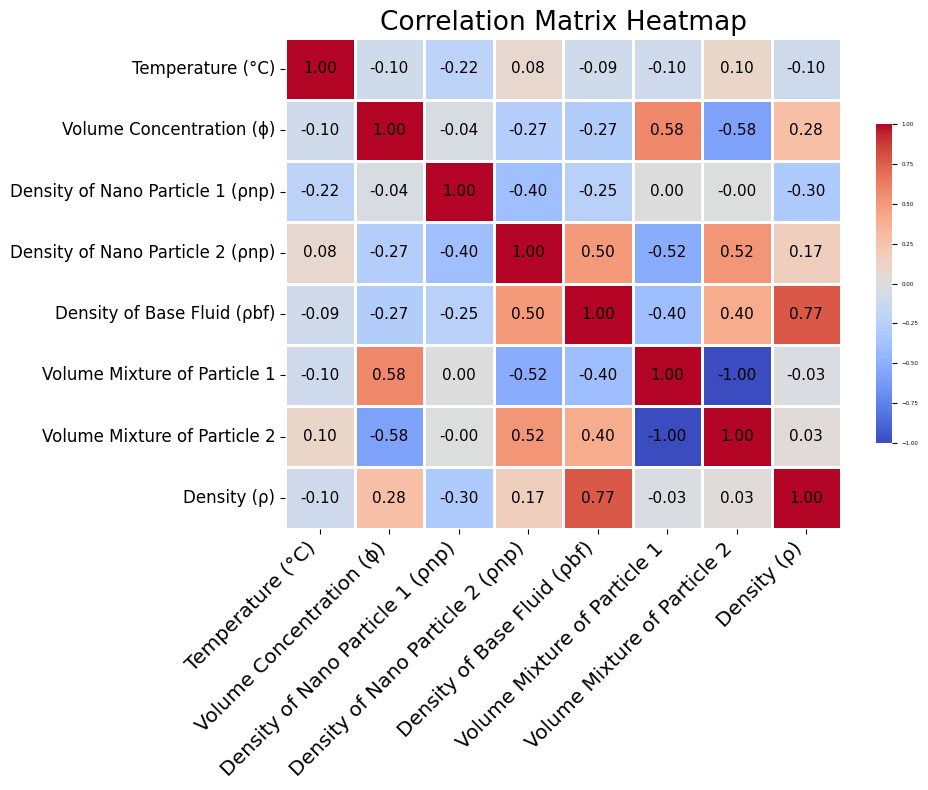

In [ ]:
#Heatmap of correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['Temperature (°C)', 'Volume Concentration (ϕ)',
                  'Density of Nano Particle 1 (ρnp)', 'Density of Nano Particle 2 (ρnp)',
                  'Density of Base Fluid (ρbf)', 'Volume Mixture of Particle 1',
                  'Volume Mixture of Particle 2', 'Density (ρ)']


plt.figure(figsize=(10, 8))
corr_matrix = density_df[numerical_cols].corr()
print(corr_matrix)

sns.heatmap(corr_matrix,
            cmap='coolwarm',
            annot=True,
            annot_kws={"size": 11, "color": "black"},
            fmt=".2f",
            linewidths=.8,
            cbar_kws={"shrink": .65}
           )

plt.title("Correlation Matrix Heatmap", fontsize=19)
plt.xticks(rotation=45, ha='right', fontsize=14.5)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()

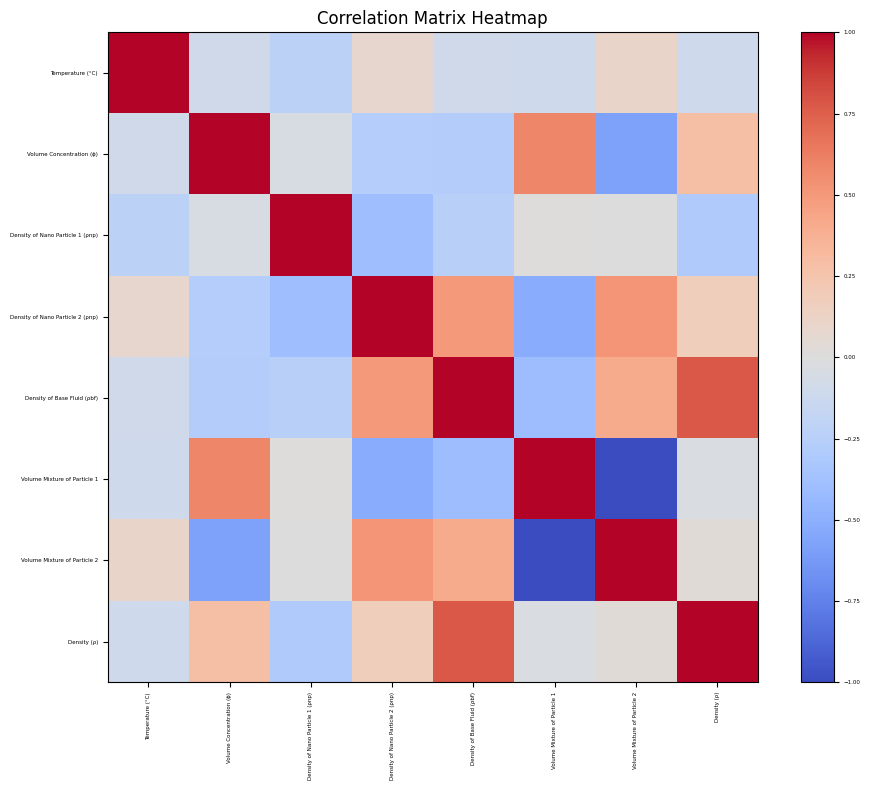

In [ ]:
# More of a visual heatmap
plt.figure(figsize=(10, 8))
corr_matrix = density_df[numerical_cols].corr()
plt.imshow(corr_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=90)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Matrix Heatmap")
plt.tight_layout()
plt.show()

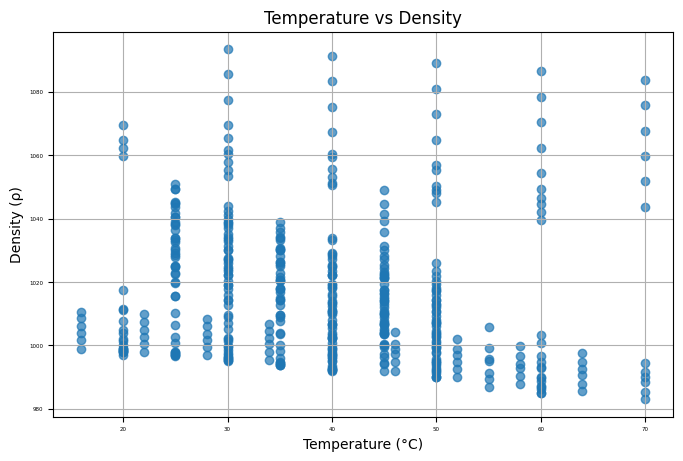

In [ ]:
# Graphing Temprature vs Density
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(density_df["Temperature (°C)"], density_df["Density (ρ)"], alpha=0.7)
plt.xlabel("Temperature (°C)")
plt.ylabel("Density (ρ)")
plt.title("Temperature vs Density")
plt.grid(True)
plt.show()

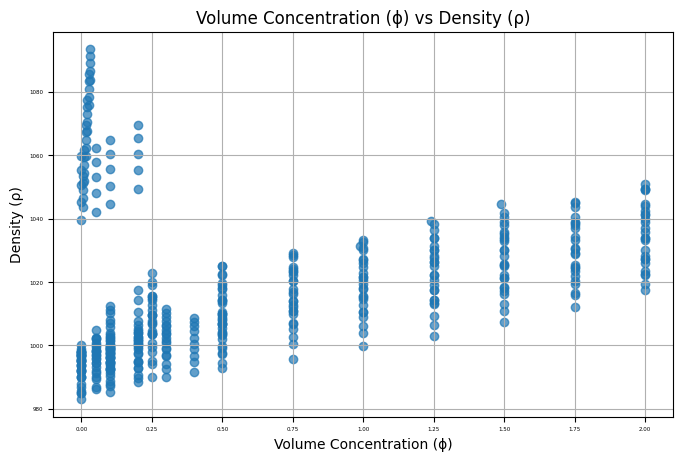

In [ ]:
# Volume Concentration vs Density
plt.figure(figsize=(8, 5))
plt.scatter(density_df["Volume Concentration (ϕ)"], density_df["Density (ρ)"], alpha=0.7)
plt.xlabel("Volume Concentration (ϕ)")
plt.ylabel("Density (ρ)")
plt.title("Volume Concentration (ϕ) vs Density (ρ)")
plt.grid(True)
plt.show()

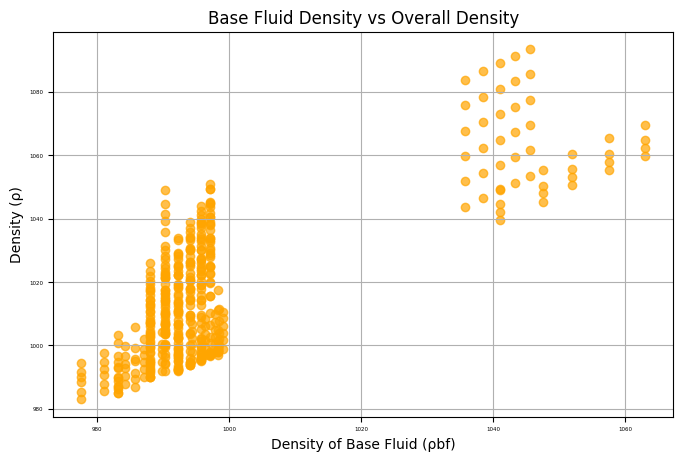

In [ ]:
#Base Fluid vs Overall Density
plt.figure(figsize=(8, 5))
plt.scatter(density_df["Density of Base Fluid (ρbf)"], density_df["Density (ρ)"], alpha=0.7, color='orange')
plt.xlabel("Density of Base Fluid (ρbf)")
plt.ylabel("Density (ρ)")
plt.title("Base Fluid Density vs Overall Density")
plt.grid(True)
plt.show()

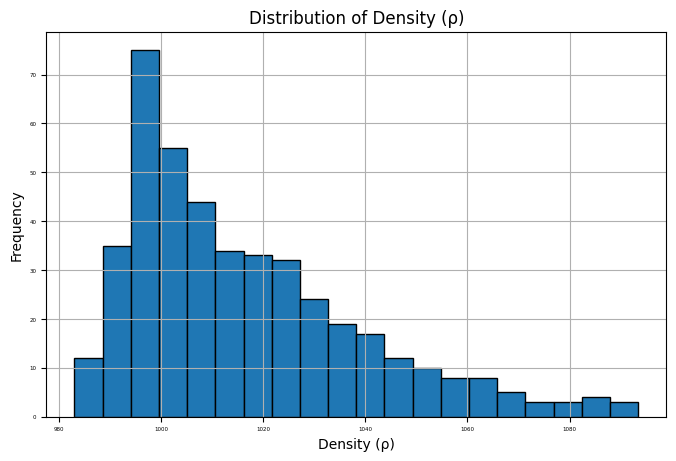

In [ ]:
#Target variable hisotgram
plt.figure(figsize=(8, 5))
plt.hist(density_df["Density (ρ)"], bins=20, edgecolor='black')
plt.xlabel("Density (ρ)")
plt.ylabel("Frequency")
plt.title("Distribution of Density (ρ)")
plt.grid(True)
plt.show()

<ipython-input-281-48b982406d31>:8: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_particle, labels=unique_particles, showfliers=False)


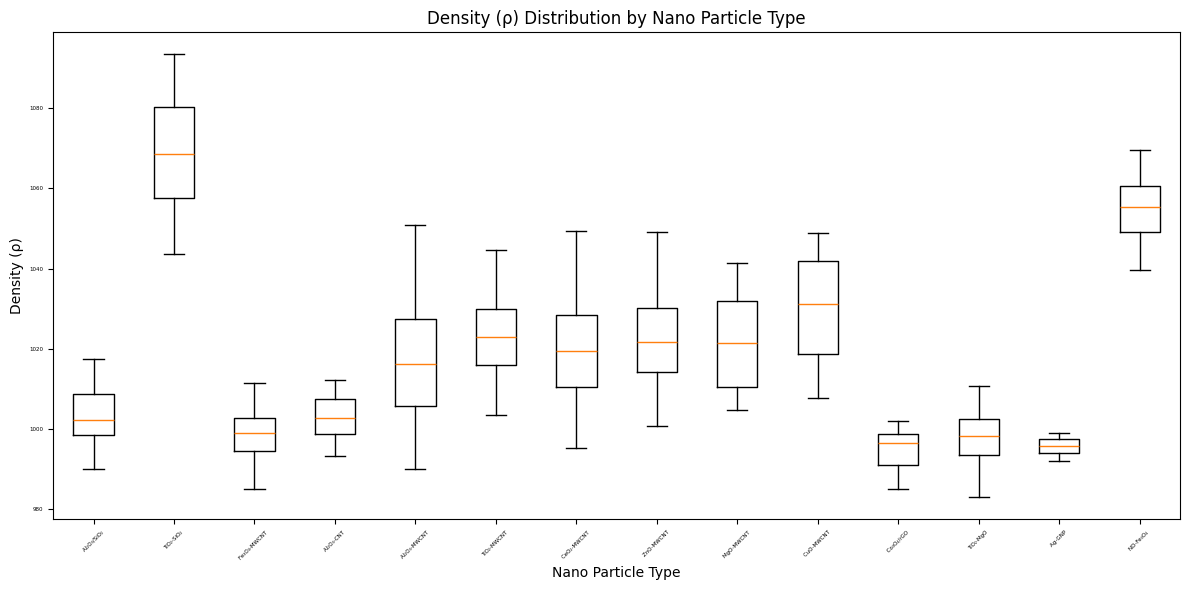

In [ ]:
# Boxplot of density by nano particle type
particles = density_df["Nano Particle"]
unique_particles = particles.unique()

data_by_particle = [density_df["Density (ρ)"][particles == p] for p in unique_particles]

plt.figure(figsize=(12, 6))
plt.boxplot(data_by_particle, labels=unique_particles, showfliers=False)
plt.xticks(rotation=45)
plt.xlabel("Nano Particle Type")
plt.ylabel("Density (ρ)")
plt.title("Density (ρ) Distribution by Nano Particle Type")
plt.tight_layout()
plt.show()

<ipython-input-282-8373d47f539d>:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data_by_particle_temp, labels=unique_particles, showfliers=False)


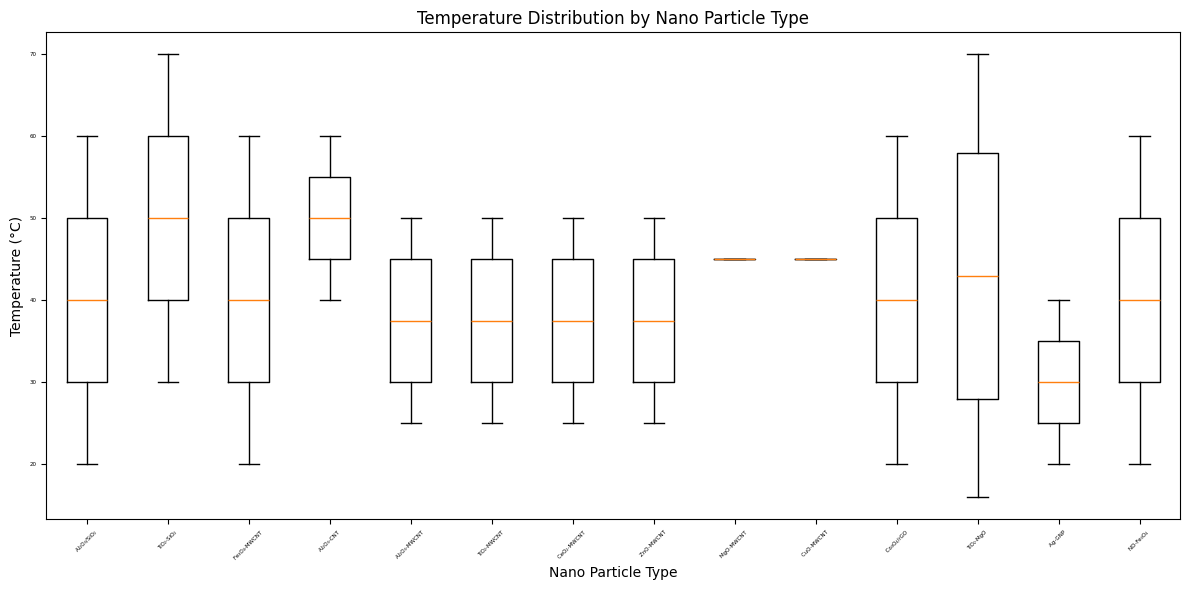

In [ ]:
# Boxplot: Temperature Distribution by Nano Particle Type
plt.figure(figsize=(12, 6))
unique_particles = density_df["Nano Particle"].unique()
data_by_particle_temp = [density_df["Temperature (°C)"][density_df["Nano Particle"] == p] for p in unique_particles]
plt.boxplot(data_by_particle_temp, labels=unique_particles, showfliers=False)
plt.xticks(rotation=45)
plt.xlabel("Nano Particle Type")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Distribution by Nano Particle Type")
plt.tight_layout()
plt.rcParams['xtick.labelsize'] = 4
plt.rcParams['ytick.labelsize'] = 4
plt.show()

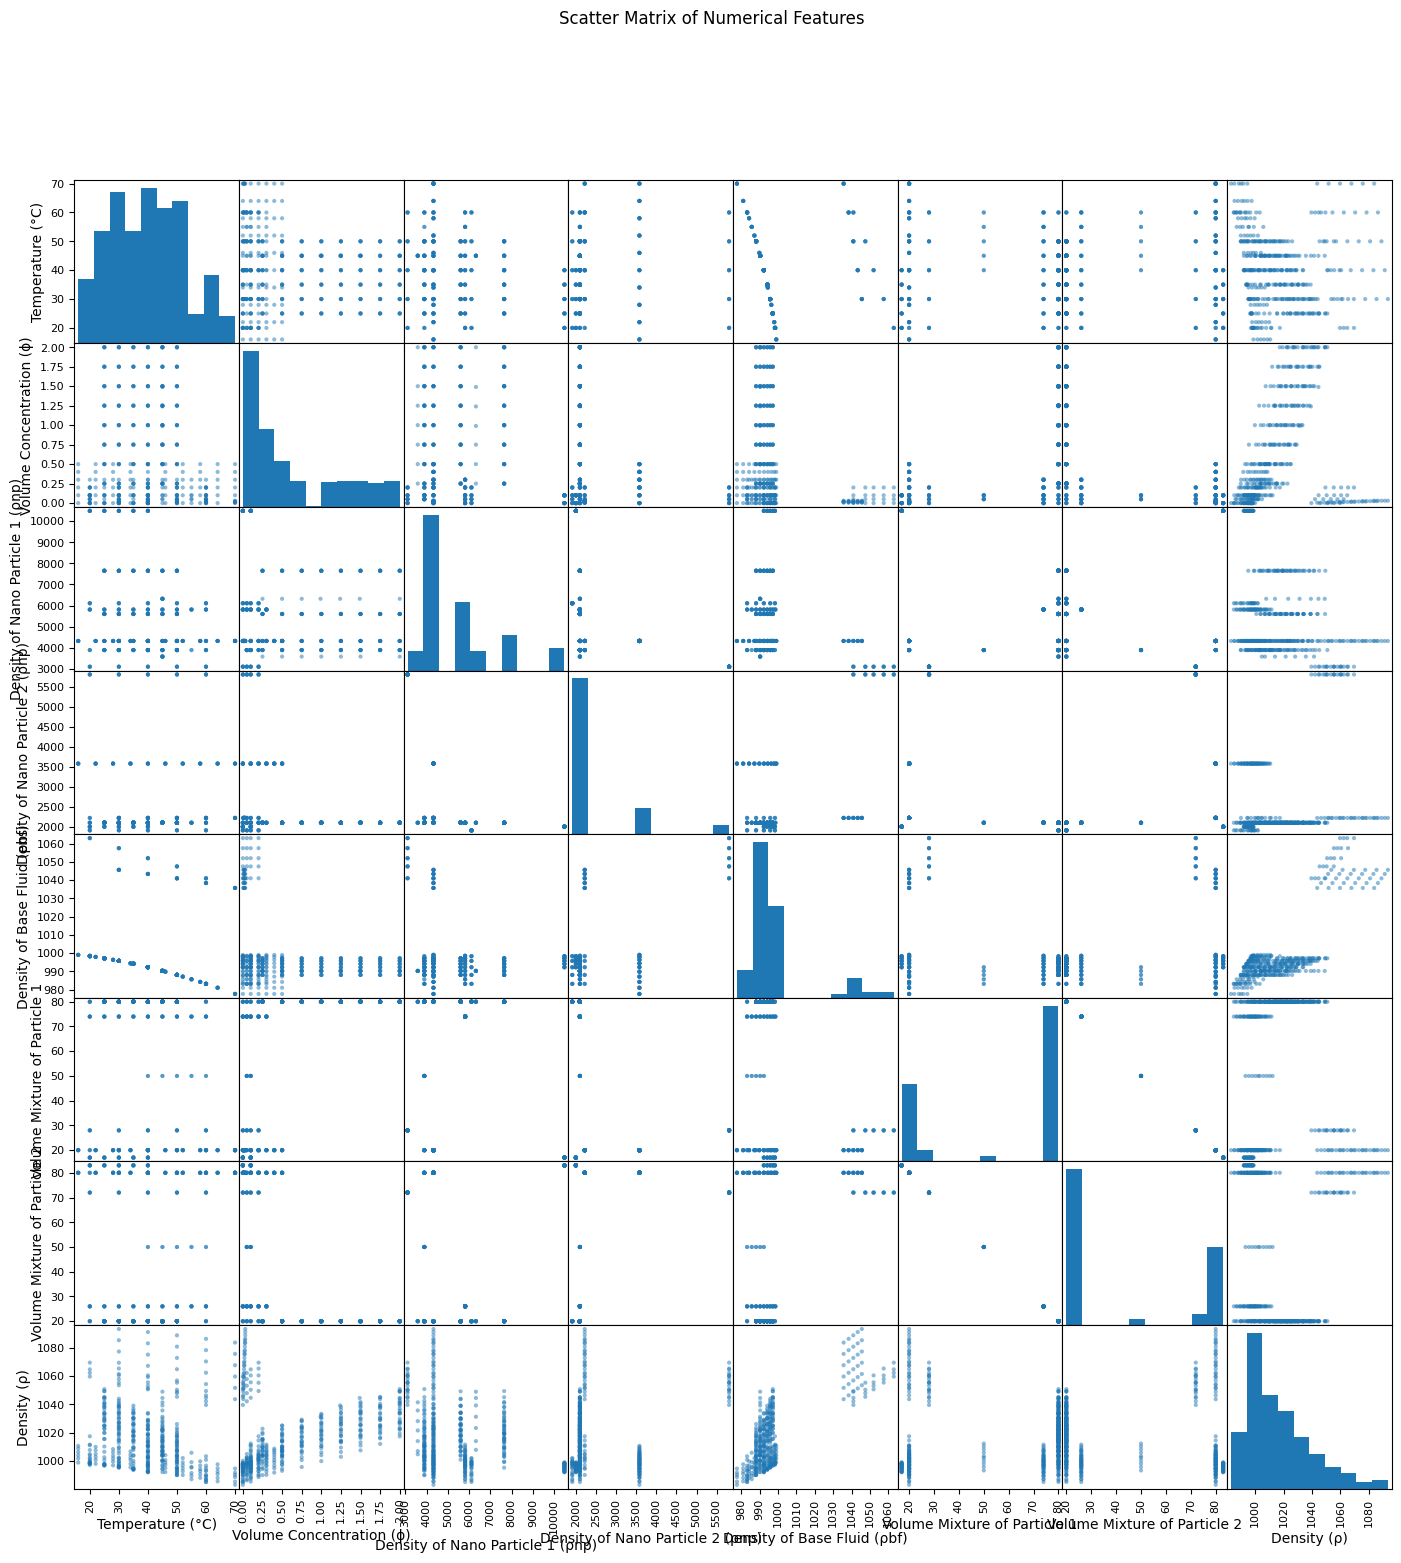

In [ ]:
# Scatter Matrix (Pair Plot) for Numerical Features
numerical_cols = ['Temperature (°C)', 'Volume Concentration (ϕ)',
                  'Density of Nano Particle 1 (ρnp)', 'Density of Nano Particle 2 (ρnp)',
                  'Density of Base Fluid (ρbf)', 'Volume Mixture of Particle 1',
                  'Volume Mixture of Particle 2', 'Density (ρ)']

pd.plotting.scatter_matrix(density_df[numerical_cols], figsize=(17, 17), diagonal='hist')
plt.suptitle("Scatter Matrix of Numerical Features")
plt.rcParams['xtick.labelsize'] = 4
plt.rcParams['ytick.labelsize'] = 4
plt.show()

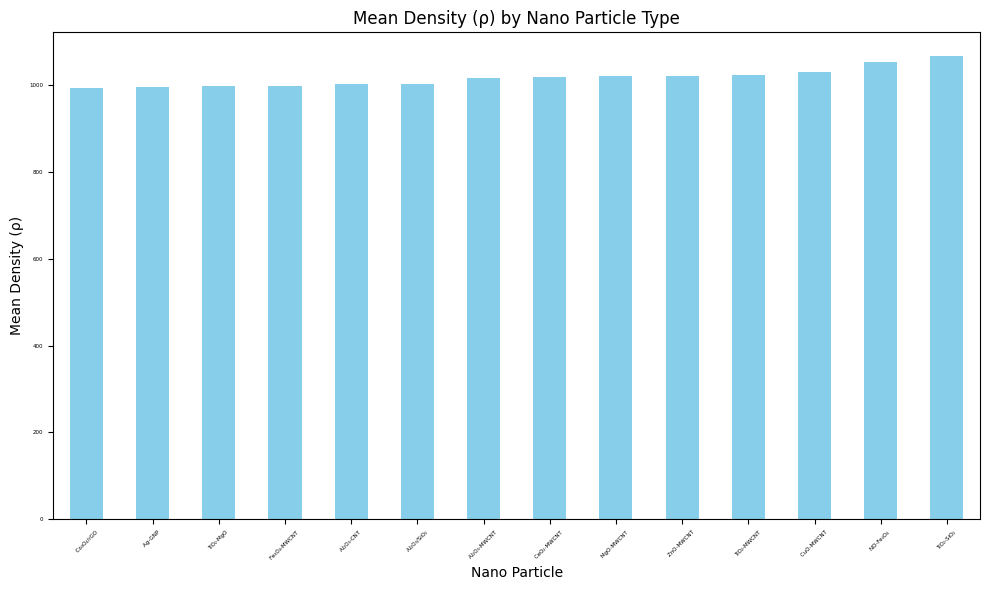

In [ ]:
# Bar Chart: Mean Density (ρ) by Nano Particle Type
mean_density_by_particle = density_df.groupby("Nano Particle")["Density (ρ)"].mean().sort_values()
plt.figure(figsize=(10, 6))
mean_density_by_particle.plot(kind='bar', color='skyblue')
plt.ylabel("Mean Density (ρ)")
plt.title("Mean Density (ρ) by Nano Particle Type")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

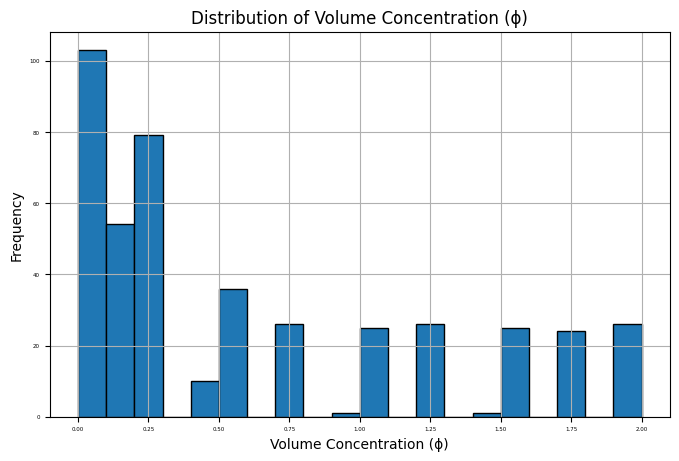

In [ ]:
# Histogram: Distribution of Volume Concentration (ϕ)
plt.figure(figsize=(8, 5))
plt.hist(density_df["Volume Concentration (ϕ)"], bins=20, edgecolor='black')
plt.xlabel("Volume Concentration (ϕ)")
plt.ylabel("Frequency")
plt.title("Distribution of Volume Concentration (ϕ)")
plt.grid(True)
plt.show()


#Data Preprocessing

In [ ]:
# Skewness and IQR
skewness = density_df[numerical_cols].skew()
print("Skewness for numerical features:")
print(skewness)


def count_outliers(series, multiplier=1.5):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return ((series < lower_bound) | (series > upper_bound)).sum()

print("\nOutlier counts for numerical features:")
for col in numerical_cols:
    outliers = count_outliers(density_df[col])
    print(f"{col}: {outliers} outliers")


Skewness for numerical features:
Temperature (°C)                    0.330733
Volume Concentration (ϕ)            0.941815
Density of Nano Particle 1 (ρnp)    1.402899
Density of Nano Particle 2 (ρnp)    2.596124
Density of Base Fluid (ρbf)         2.249247
Volume Mixture of Particle 1       -0.555918
Volume Mixture of Particle 2        0.555918
Density (ρ)                         1.096213
dtype: float64

Outlier counts for numerical features:
Temperature (°C): 0 outliers
Volume Concentration (ϕ): 0 outliers
Density of Nano Particle 1 (ρnp): 30 outliers
Density of Nano Particle 2 (ρnp): 100 outliers
Density of Base Fluid (ρbf): 56 outliers
Volume Mixture of Particle 1: 0 outliers
Volume Mixture of Particle 2: 0 outliers
Density (ρ): 13 outliers


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder, RobustScaler, PolynomialFeatures
from sklearn.compose import ColumnTransformer


In [ ]:
# isnull() check for missing values
print("Missing values per column:")
print(density_df.isnull().sum())

Missing values per column:
Nano Particle                       0
Base Fluid                          0
Temperature (°C)                    0
Volume Concentration (ϕ)            0
Density of Nano Particle 1 (ρnp)    0
Density of Nano Particle 2 (ρnp)    0
Density of Base Fluid (ρbf)         0
Volume Mixture of Particle 1        0
Volume Mixture of Particle 2        0
Density (ρ)                         0
dtype: int64


In [ ]:
# added 2 new features: Density Ratio: Overall Density divided by Density of Base Fluid.
#                       Particle1 Ratio: Proportion of Particle 1 in the total mixture.

density_df['Density Ratio'] = density_df["Density (ρ)"] / density_df["Density of Base Fluid (ρbf)"]
density_df['Particle1 Ratio'] = density_df["Volume Mixture of Particle 1"] / (
    density_df["Volume Mixture of Particle 1"] + density_df["Volume Mixture of Particle 2"])

In [ ]:
#Outlier Removal Function

'''
def remove_outliers_iqr(df, column, multiplier=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - multiplier * IQR
    upper_bound = Q3 + multiplier * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

density_df = remove_outliers_iqr(density_df, "")
print("\nAfter outlier removal, Temperature range:",
      density_df[""].min(), "-",
      density_df[""].max())
'''


'\ndef remove_outliers_iqr(df, column, multiplier=1.5):\n    Q1 = df[column].quantile(0.25)\n    Q3 = df[column].quantile(0.75)\n    IQR = Q3 - Q1\n    lower_bound = Q1 - multiplier * IQR\n    upper_bound = Q3 + multiplier * IQR\n    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]\n\ndensity_df = remove_outliers_iqr(density_df, "")\nprint("\nAfter outlier removal, Temperature range:",\n      density_df[""].min(), "-",\n      density_df[""].max())\n'

In [ ]:
# Skew and log1p transformation
vol_conc_skew = density_df["Volume Concentration (ϕ)"].skew()
print("\nSkewness of 'Volume Concentration (ϕ)':", vol_conc_skew)
if abs(vol_conc_skew) > 1:
    density_df["Volume Concentration (ϕ)"] = np.log1p(density_df["Volume Concentration (ϕ)"])
    print("Applied log1p transformation to 'Volume Concentration (ϕ)'.")


Skewness of 'Volume Concentration (ϕ)': 0.9418146494008268


In [ ]:
# Create polynomial features for Temperature and Volume Concentration (ϕ)
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
poly_features = poly.fit_transform(density_df[['Temperature (°C)', 'Volume Concentration (ϕ)']])
poly_feature_names = ["poly_"+ col for col in poly.get_feature_names_out(['Temperature (°C)', 'Volume Concentration (ϕ)'])]
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=density_df.index)

In [ ]:
# Concatenate polynomial features with the original dataframe
density_df = pd.concat([density_df, poly_df], axis=1)

In [ ]:
# Define target variable and features
target = "Density (ρ)"
features = density_df.drop(columns=[target])

In [ ]:
# Identify categorical and numerical features
# "Nano Particle" and "Base Fluid" are categorical; all others are numerical.
categorical_features = ["Nano Particle", "Base Fluid"]
numerical_features = [col for col in features.columns if col not in categorical_features]

print("\nCategorical features:", categorical_features)
print("Numerical features:", numerical_features)


#    RobustScaler for numerical features to reduce the impact of outliers.
#    OneHotEncoder for categorical features (dropping the first category to avoid multicollinearity).
num_transformer = RobustScaler()
cat_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', num_transformer, numerical_features),
        ('cat', cat_transformer, categorical_features)
    ])

# Fit and transform the features
X_preprocessed = preprocessor.fit_transform(features)
y = density_df[target]

print("\nShape of preprocessed features:", X_preprocessed.shape)
print("Shape of target variable:", y.shape)


Categorical features: ['Nano Particle', 'Base Fluid']
Numerical features: ['Temperature (°C)', 'Volume Concentration (ϕ)', 'Density of Nano Particle 1 (ρnp)', 'Density of Nano Particle 2 (ρnp)', 'Density of Base Fluid (ρbf)', 'Volume Mixture of Particle 1', 'Volume Mixture of Particle 2', 'Density Ratio', 'Particle1 Ratio', 'poly_Temperature (°C)', 'poly_Volume Concentration (ϕ)', 'poly_Temperature (°C)^2', 'poly_Temperature (°C) Volume Concentration (ϕ)', 'poly_Volume Concentration (ϕ)^2']

Shape of preprocessed features: (436, 30)
Shape of target variable: (436,)


#Data Split, Model Training, and Evaluation

In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Split
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

# Define models
lr = LinearRegression()
dt = DecisionTreeRegressor(random_state=42)
rf = RandomForestRegressor(random_state=42)

models = {
    "Linear Regression": lr,
    "Decision Tree": dt,
    "Random Forest": rf
}

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    print(f"{name} Results:")
    print(f"  Test MSE: {mse:.2f}")
    print(f"  Test MAE: {mae:.2f}")
    print(f"  Test R^2: {r2:.2f}")

    # 5-fold cross-validation
    if name == "Random Forest":
        cv_scores = cross_val_score(model, X_preprocessed, y, cv=5, scoring="neg_mean_squared_error")
        cv_mse = -cv_scores.mean()
        print(f"  5-Fold CV MSE: {cv_mse:.2f}\n")
    else:
        print("")


Linear Regression Results:
  Test MSE: 0.02
  Test MAE: 0.10
  Test R^2: 1.00

Decision Tree Results:
  Test MSE: 5.42
  Test MAE: 1.73
  Test R^2: 0.99

Random Forest Results:
  Test MSE: 4.59
  Test MAE: 1.39
  Test R^2: 0.99
  5-Fold CV MSE: 186.97



#Clustering

In [ ]:
target            = "Density (ρ)"

cols_to_exclude   = ["Density Ratio", "Particle1 Ratio"]   # the two weak features
features          = density_df.drop(columns=[target] + cols_to_exclude)

categorical_features = ["Nano Particle", "Base Fluid"]
numerical_features   = [c for c in features.columns if c not in categorical_features]

num_transformer   = RobustScaler()
cat_transformer   = OneHotEncoder(drop='first')

preprocessor      = ColumnTransformer(
        [("num", num_transformer,  numerical_features),
         ("cat", cat_transformer,  categorical_features)]
)

X_preprocessed    = preprocessor.fit_transform(features)
print("Shape after dropping ratios:", X_preprocessed.shape)


Shape after dropping ratios: (436, 28)


In [ ]:
# Define & evaluate clustering models

from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score
import pandas as pd

cluster_models = {
    "KMeans":        KMeans(n_clusters=4, random_state=42),
    "DBSCAN":        DBSCAN(eps=1.5, min_samples=5),
    "Agglomerative": AgglomerativeClustering(n_clusters=4)
}

cluster_results = []
labels_dict = {}                      # keep labels
for name, model in cluster_models.items():
    labels = model.fit_predict(X_preprocessed)
    labels_dict[name] = labels
    k = len(set(labels)) - (1 if -1 in labels else 0)
    score = silhouette_score(X_preprocessed, labels) if k > 1 else float("nan")
    cluster_results.append({"Model": name, "Clusters": k, "Silhouette Score": score})

cluster_results_df = pd.DataFrame(cluster_results).round(3)
display(cluster_results_df.style.hide(axis='index'))
print("\nClustering Evaluation Results:")
print(cluster_results_df.to_string(index=False))


Model,Clusters,Silhouette Score
KMeans,4,0.632000
DBSCAN,10,0.350000
Agglomerative,4,0.632000



Clustering Evaluation Results:
        Model  Clusters  Silhouette Score
       KMeans         4             0.632
       DBSCAN        10             0.350
Agglomerative         4             0.632


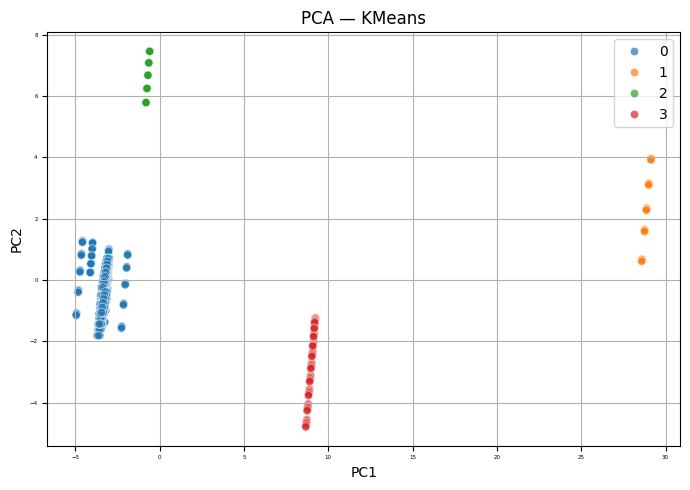

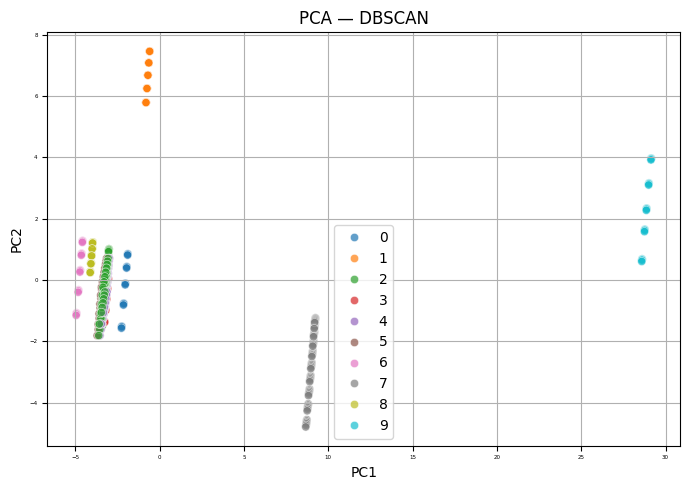

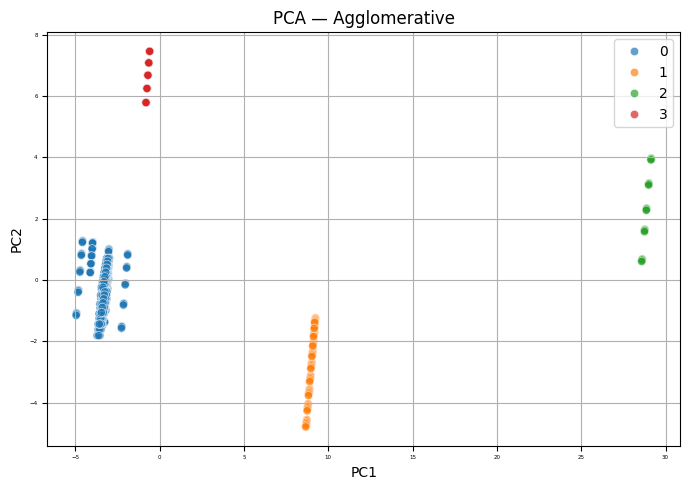

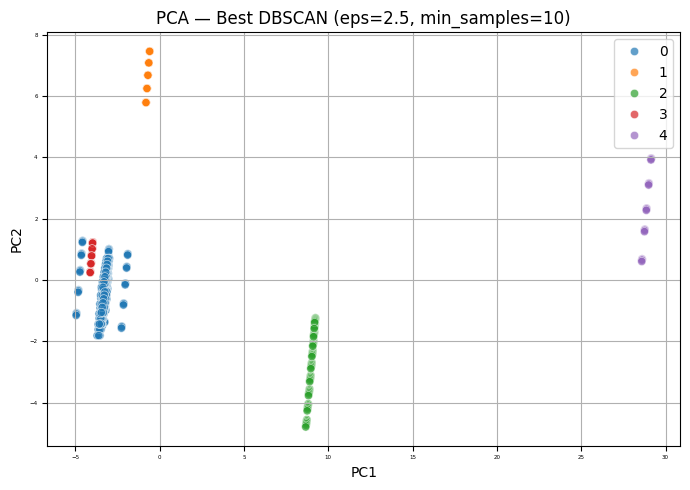

In [ ]:
# PCA scatterplots for each model

from sklearn.decomposition import PCA


pca = PCA(n_components=2).fit_transform(X_preprocessed)

def plot_clusters(lbls, title):
    plt.figure(figsize=(7,5))
    sns.scatterplot(x=pca[:,0], y=pca[:,1], hue=lbls,
                    palette="tab10", legend="full", alpha=0.7)
    plt.title(title); plt.xlabel("PC1"); plt.ylabel("PC2")
    plt.grid(True); plt.tight_layout(); plt.show()

for name, lbls in labels_dict.items():
    plot_clusters(lbls, f"PCA — {name}")

# Retune DBSCAN for fewer clusters
db_tuned = DBSCAN(eps=2.5, min_samples=10)
labels_tuned = db_tuned.fit_predict(X_preprocessed)
plot_clusters(labels_tuned, "PCA — Best DBSCAN (eps=2.5, min_samples=10)")


In [ ]:
# Feature means for each cluster

density_df["KMeans"]        = labels_dict["KMeans"]
density_df["Agglomerative"] = labels_dict["Agglomerative"]
density_df["DBSCAN_tuned"]  = labels_tuned

summary_cols = ["Temperature (°C)", "Volume Concentration (ϕ)",
                "Density Ratio", "Particle1 Ratio"]

for col in ["KMeans", "Agglomerative", "DBSCAN_tuned"]:
    print(f"\n=== {col} cluster means ===")
    display(
        density_df.groupby(col)[summary_cols]
                  .mean()
                  .round(3)
                  .reset_index()
    )



=== KMeans cluster means ===


,KMeans,Temperature (°C),Volume Concentration (ϕ),Density Ratio,Particle1 Ratio
0,0,38.129,0.743,1.020,0.697
1,1,40.000,0.088,1.002,0.280
2,2,50.000,0.018,1.027,0.200
3,3,43.000,0.250,1.008,0.200



=== Agglomerative cluster means ===


,Agglomerative,Temperature (°C),Volume Concentration (ϕ),Density Ratio,Particle1 Ratio
0,0,38.129,0.743,1.020,0.697
1,1,43.000,0.250,1.008,0.200
2,2,40.000,0.088,1.002,0.280
3,3,50.000,0.018,1.027,0.200



=== DBSCAN_tuned cluster means ===


,DBSCAN_tuned,Temperature (°C),Volume Concentration (ϕ),Density Ratio,Particle1 Ratio
0,0,38.953,0.813,1.022,0.75
1,1,50.000,0.018,1.027,0.20
2,2,43.000,0.250,1.008,0.20
3,3,30.000,0.050,1.000,0.17
4,4,40.000,0.088,1.002,0.28


,k,sil,db
0,2,0.778,0.201
1,3,0.410,0.563
2,4,0.632,0.370
3,5,0.481,0.459
4,6,0.494,0.606
5,7,0.435,0.831
6,8,0.421,0.937
7,9,0.427,0.852
8,10,0.394,0.848


,k,sil,db
0,2,0.707,0.644
1,3,0.705,0.300
2,4,0.632,0.370
3,5,0.462,0.636
4,6,0.494,0.606
5,7,0.453,0.640
6,8,0.374,0.928
7,9,0.369,0.960
8,10,0.358,1.056


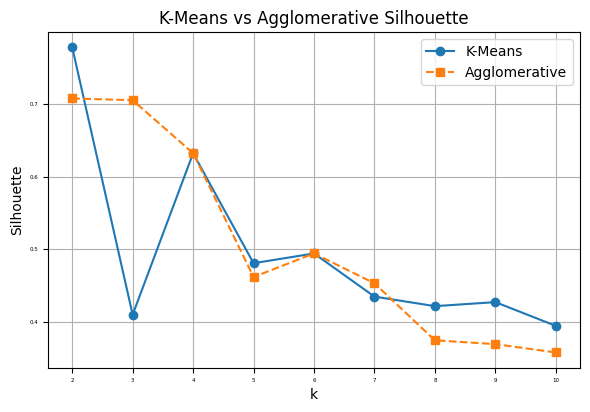

In [ ]:
# Sweep k (2–10) for KM & AGG, collect Silhouette and DBI
from sklearn.metrics import silhouette_score, davies_bouldin_score
import pandas as pd, matplotlib.pyplot as plt

k_range = range(2, 11)
km_stats, agg_stats = [], []

for k in k_range:
    km  = KMeans(n_clusters=k, random_state=42).fit(X_preprocessed)
    agg = AgglomerativeClustering(n_clusters=k).fit(X_preprocessed)

    km_stats.append([k,
                     silhouette_score(X_preprocessed, km.labels_),
                     davies_bouldin_score(X_preprocessed, km.labels_)])
    agg_stats.append([k,
                      silhouette_score(X_preprocessed, agg.labels_),
                      davies_bouldin_score(X_preprocessed, agg.labels_)])

km_df  = pd.DataFrame(km_stats,  columns=["k","sil","db"])
agg_df = pd.DataFrame(agg_stats, columns=["k","sil","db"])
display(km_df.round(3), agg_df.round(3))

plt.figure(figsize=(6,4))
plt.plot(k_range, km_df["sil"],  "o-", label="K-Means")
plt.plot(k_range, agg_df["sil"], "s--", label="Agglomerative")
plt.xlabel("k"); plt.ylabel("Silhouette"); plt.grid(True); plt.legend(); plt.tight_layout(); plt.title('K-Means vs Agglomerative Silhouette'); plt.show()


In [ ]:
# Grid search ε × minPts for DBSCAN
from itertools import product
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

eps_vals     = [1.5, 2.0, 2.5, 3.0]
minpts_vals  = [5, 8, 10]
best_sil, best_cfg, best_labels = -1, None, None

for eps, mp in product(eps_vals, minpts_vals):
    db = DBSCAN(eps=eps, min_samples=mp).fit(X_preprocessed)
    lbl = db.labels_
    k   = len(set(lbl)) - (1 if -1 in lbl else 0)
    if k < 2:                                   # ≥2 clusters
        continue
    sil = silhouette_score(X_preprocessed[lbl != -1], lbl[lbl != -1])
    if sil > best_sil:
        best_sil, best_cfg, best_labels = sil, (eps, mp), lbl

print(f"Best DBSCAN  ε={best_cfg[0]}  minPts={best_cfg[1]}  silhouette={best_sil:.3f}")
labels_tuned = best_labels          # keep for later use


Best DBSCAN  ε=3.0  minPts=5  silhouette=0.632


In [ ]:
# Gaussian Mixture Model (4 comps)
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

gmm = GaussianMixture(n_components=4, covariance_type="full", random_state=42).fit(X_preprocessed)
labels_gmm = gmm.predict(X_preprocessed)
sil_gmm = silhouette_score(X_preprocessed, labels_gmm)
print(f"GMM silhouette = {sil_gmm:.3f}")


GMM silhouette = 0.632


Mean sil = 0.496   SD = 0.136


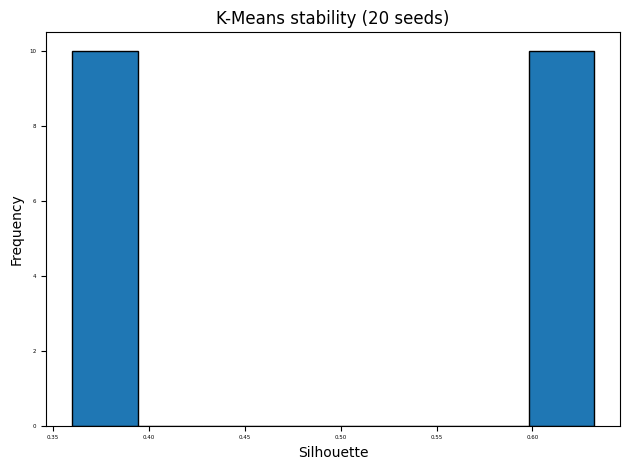

In [ ]:
# Silhouette distribution over 20 random seeds
import numpy as np, matplotlib.pyplot as plt
sils = [silhouette_score(X_preprocessed,
         KMeans(n_clusters=4, random_state=s).fit_predict(X_preprocessed))
        for s in range(20)]

print(f"Mean sil = {np.mean(sils):.3f}   SD = {np.std(sils):.3f}")
plt.hist(sils, bins=8, edgecolor="k")
plt.xlabel("Silhouette"); plt.ylabel("Frequency")
plt.title("K-Means stability (20 seeds)")
plt.tight_layout(); plt.show()


In [ ]:
features.describe()

,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,poly_Temperature (°C),poly_Volume Concentration (ϕ),poly_Temperature (°C)^2,poly_Temperature (°C) Volume Concentration (ϕ),poly_Volume Concentration (ϕ)^2
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000
mean,39.701835,0.594828,5380.229358,2470.642202,998.243922,57.522936,42.477064,39.701835,0.594828,1730.756881,22.818578,0.763977
std,12.444935,0.641171,1858.166923,895.044108,17.723083,28.018663,28.018663,12.444935,0.641171,1055.719190,25.393781,1.192425
min,16.000000,0.000000,3100.000000,1910.000000,977.600000,17.000000,20.000000,16.000000,0.000000,256.000000,0.000000,0.000000
25%,30.000000,0.100000,4320.000000,2100.000000,990.220000,20.000000,20.000000,30.000000,0.100000,900.000000,2.687500,0.010000
50%,40.000000,0.300000,4320.000000,2100.000000,994.080000,80.000000,20.000000,40.000000,0.300000,1600.000000,11.250000,0.090000
75%,50.000000,1.000000,5810.000000,2220.000000,997.130000,80.000000,80.000000,50.000000,1.000000,2500.000000,37.500000,1.000000
max,70.000000,2.000000,10490.000000,5810.000000,1063.000000,80.000000,83.000000,70.000000,2.000000,4900.000000,100.000000,4.000000
